**Multiarmed Bandits: Optimistic Greedy versus Realistic epsilon-Greedy algorithms**

In this notebook, we use OpenAI Gym to implement optimistic and realistic initializations

In [1]:
import gym

Unfortunatley, Gym does not provide a bandit environment so we need to import it, lets install one with the command below:

In [2]:
!git clone https://github.com/JKCooper2/gym-bandits.git > /dev/null 2>&1
!pip install /content/gym-bandits/. > /dev/null 2>&1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Let's import needed packages

In [3]:
import gym_bandits
import numpy as np
import matplotlib.pyplot as plt
import random
from tqdm import tqdm

Define the epsilon-Greedy actions (Note: if epsilon=0 it corresponds to the Greedy action)

In [4]:
def get_action(Q, e):
    if random.random() < e:
        return random.randint(0, 9)
    else:
        return np.argmax(Q)

We define a function that compute the average of obtained reward over repeated experiments.

In [5]:
def average(tot_rewards):
    avg = []
    for i in range(len(tot_rewards[0])):
        temp = 0
        for j in range(len(tot_rewards)):
            temp += tot_rewards[j][i]
        temp /= len(tot_rewards)
        avg.append(temp)
    return avg

Main code: define an Environment for 10-armed Bandit whose rewards are normal distributed with standard deviation = 1 and a mean drawn from a normal distribution (0,1). Same as Sutton&Barto book

In [6]:
k = 10  # Number of actions (arms)
iter = 1000 # Number of steps
repeat = 2000 # Number of repetitions
o0 = []  # Results for Optimistic Greedy algorithm
e01 = [] # Results for epsilon = 0.1

np.random.seed(42)
env = gym.make("BanditTenArmedGaussian-v0") # define Environment

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


Run the Optimistic Greedy algorithm (epsilon = 0) several times to average the results

In [7]:
env.reset()
tot_rewards = []
e = 0
for _ in tqdm(range(repeat)):
    Q = 5 * np.ones(shape=(k))
    N = np.zeros(shape=(k))
    rewards = []
    for i in range(iter):
        action = get_action(Q, e)
        state, reward, done, info = env.step(action)
        rewards.append(reward)
        N[action] += 1
        Q[action] = Q[action] +  1/N[action] * (reward - Q[action])
    env.reset()
    tot_rewards.append(rewards)

o0 = average(tot_rewards)

/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:190: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `return_info` to return information from the environment resetting.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:195: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `options` to allow the environment initialisation to be passed additional information.
  logger.warn(
  0%|          | 0/2000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:227: DeprecationWarning: WARN: Core environment is written in old step API which returns one bool instead of two

Run the realistic epsilon-Greedy algorithm with epsilon = 0.01 several times to average the results

In [8]:
env.reset()
tot_rewards = []
e = 0.1
for _ in tqdm(range(repeat)):
    Q = np.zeros(shape=(k))
    N = np.zeros(shape=(k))
    rewards = []
    for i in range(iter):
        action = get_action(Q, e)
        state, reward, done, info = env.step(action)
        rewards.append(reward)
        N[action] += 1
        Q[action] = Q[action] +  1/N[action] * (reward - Q[action])
    env.reset()
    tot_rewards.append(rewards)

e01 = average(tot_rewards)

100%|██████████| 2000/2000 [00:49<00:00, 40.11it/s]


Finally, we plot the results to compare the Greedy algorithm against the epsilon-Greedy algorithm

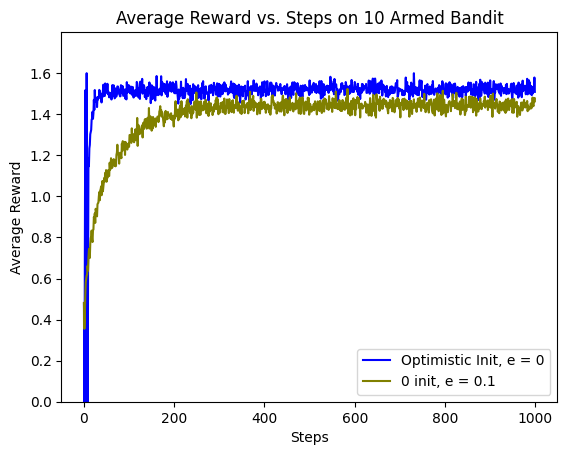

In [9]:
plt.plot(o0, color='blue', label='Optimistic Init, e = 0')
plt.plot(e01, color='olive', label='0 init, e = 0.1')
plt.xlabel("Steps")
plt.ylim(0, max(o0) + 0.2)
plt.ylabel("Average Reward")
plt.title("Average Reward vs. Steps on 10 Armed Bandit")
plt.legend()
plt.show()
